In [1]:
pip install pytube matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install missingno


In [3]:
!pip install wordcloud


In [34]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from math import pi
from wordcloud import WordCloud

In [35]:
pd.set_option("display.max_columns",None)
mpl.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
%matplotlib inline

color_scheme = px.colors.sequential.Peach

In [36]:
import pandas as pd
df = pd.read_csv(r"C:\Users\SUBALAKSHMI\Downloads\most_subscribed_youtube_channels.csv")[:100]


In [37]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [39]:
print(df.shape)
df.head(3)

(100, 7)


,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006


In [40]:
f_col = ['subscribers','video count','video views']


df['video views'] = df['video views'].astype(str).apply(lambda x:x.replace(',',''))
df['video count'] = df['video count'].astype(str).apply(lambda x:x.replace(',',''))
df['subscribers'] = df['subscribers'].astype(str).apply(lambda x:x.replace(',',''))

df['video views'] = df['video views'].astype('int64')
df['video count'] = df['video count'].astype('int64')
df['subscribers'] = df['subscribers'].astype('int64')



df[f_col] = df[f_col].astype(float)
df.drop('rank',axis=1,inplace=True)

df = df.dropna().reset_index()
df.drop('index',axis=1, inplace=True)




In [41]:
import numpy as np
df.drop(np.where(df['started'] == 1970)[0][0],inplace=True)

Text(0.5, 1.0, 'Distribution of missing values')

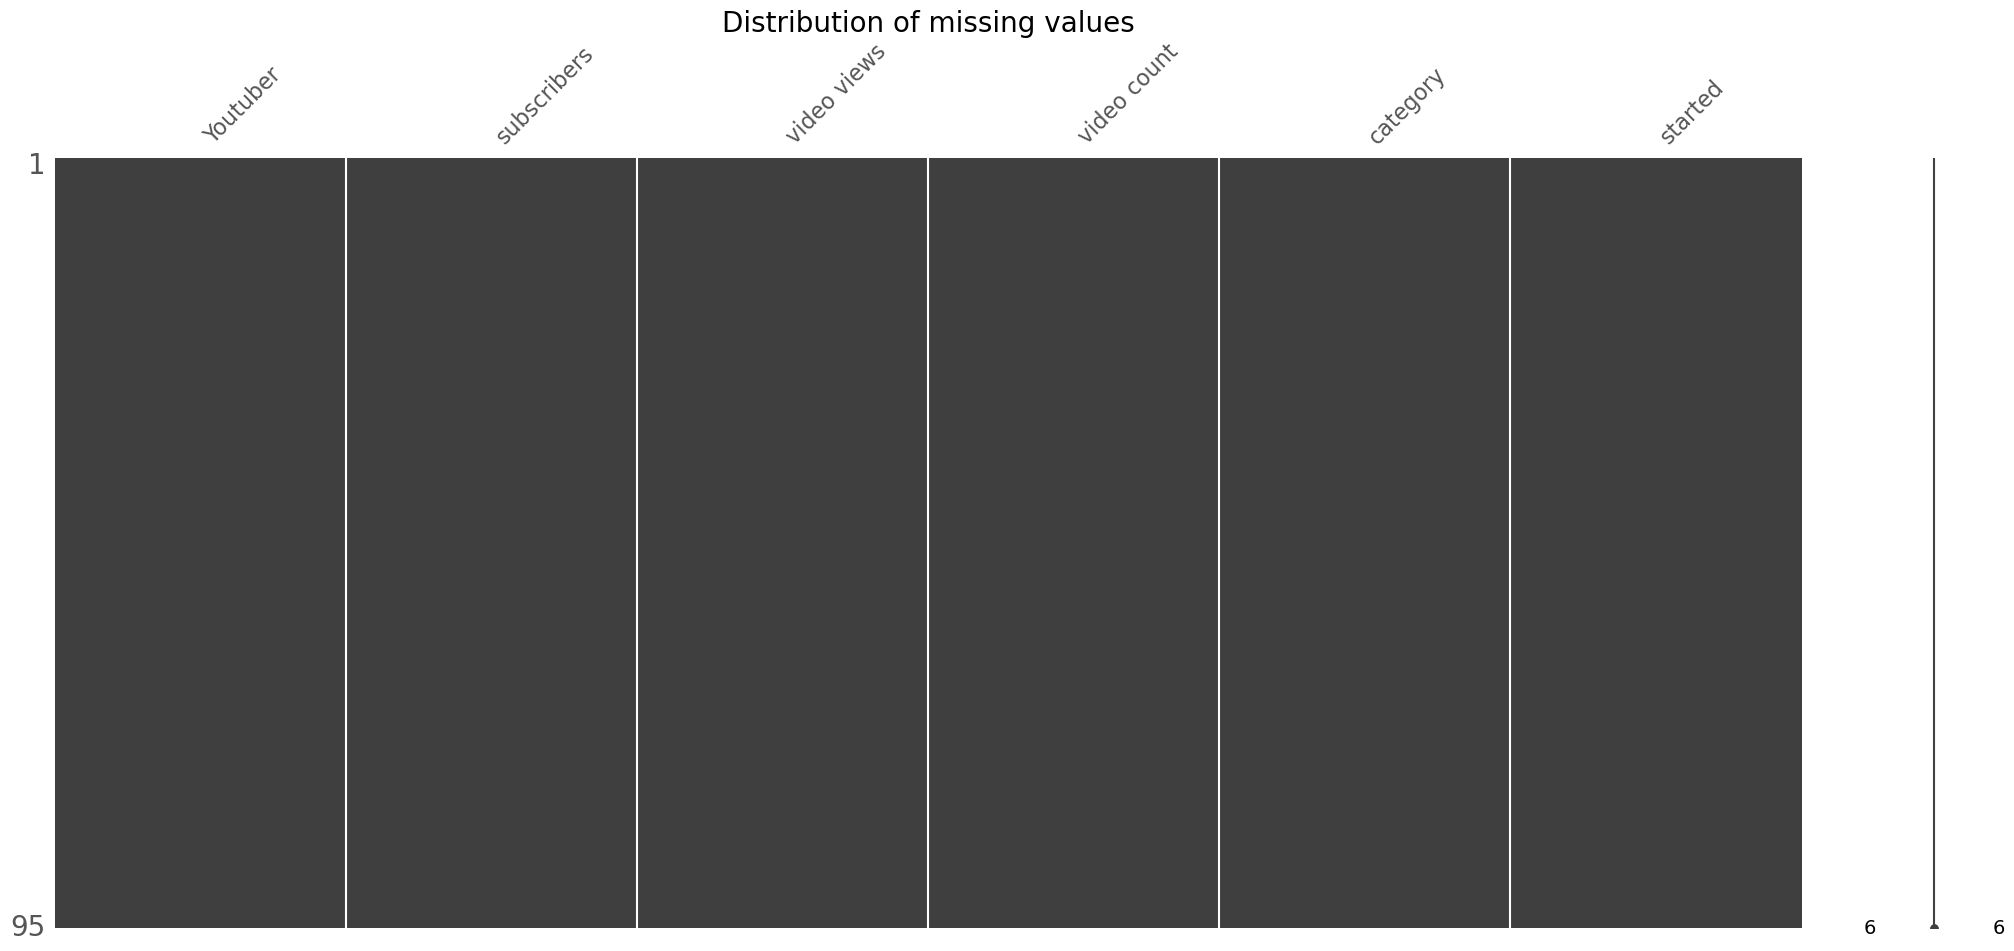

In [42]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from math import pi
from wordcloud import WordCloud
msno.matrix(df)
plt.title('Distribution of missing values', fontsize = 20)

Text(0.5, 1.0, 'Started Year of Top 100 Youtube Channel')

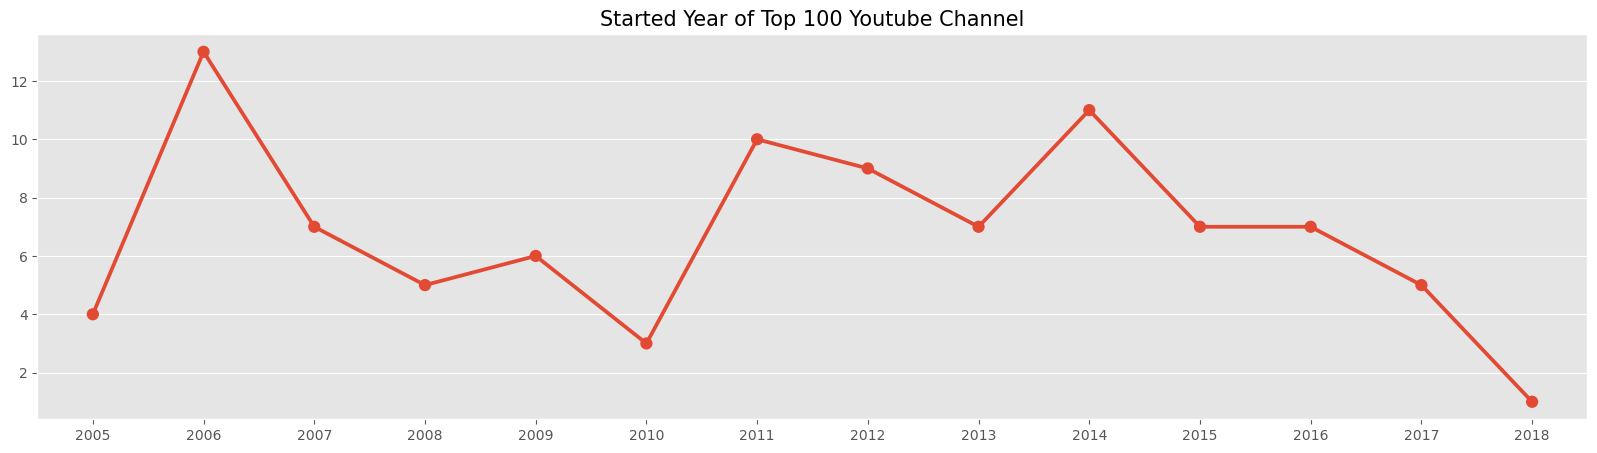

In [43]:
year = df['started'].value_counts()
plt.figure(figsize=(20,5))
sns.pointplot(x=year.index, y=year.values).set_title('Started Year of Top 100 Youtube Channel',fontsize=15)

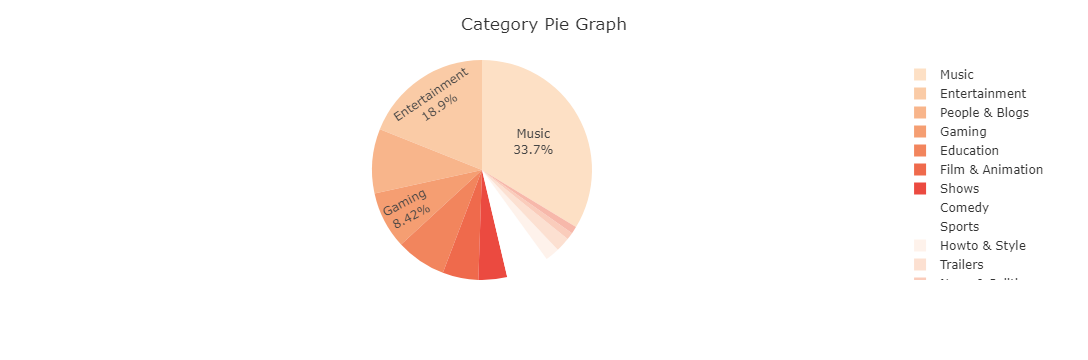

In [44]:
category = df['category'].value_counts()
fig = px.pie(values=category.values, 
             names=category.index,
             color_discrete_sequence=px.colors.sequential.Peach)
fig.update_traces(textposition='inside',
                  textfont_size=11,
                  textinfo='percent+label')

fig.update_layout(title_text="Category Pie Graph",
                  uniformtext_minsize=12, 
                  uniformtext_mode='hide',
                  template ='ggplot2')

fig.show()

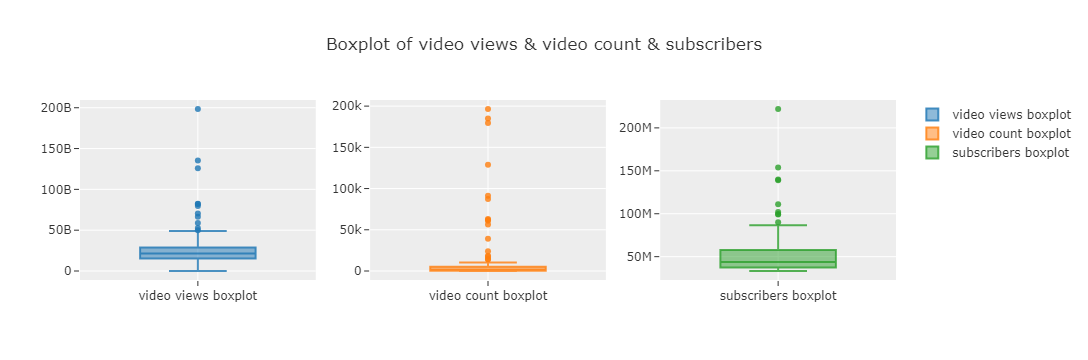

In [45]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Define a color scheme with enough colors
color_scheme = ['rgba(31, 119, 180, 0.8)', 'rgba(255, 127, 14, 0.8)', 'rgba(44, 160, 44, 0.8)']

fig = make_subplots(rows=1, cols=3)

fig.update_layout(title_text="Boxplot of video views & video count & subscribers",
                  uniformtext_minsize=12, 
                  uniformtext_mode='hide')

fig.add_trace(go.Box(y=df['video views'],
                    name="video views boxplot",
                    boxpoints='outliers', 
                    marker_color=color_scheme[0],  # Use an appropriate index from the color_scheme list
                    line_color=color_scheme[0]), row=1, col=1)

fig.add_trace(go.Box(y=df['video count'],
                     name="video count boxplot",
                     boxpoints='outliers', 
                     marker_color=color_scheme[1],  # Use an appropriate index from the color_scheme list
                     line_color=color_scheme[1]), row=1, col=2)

fig.add_trace(go.Box(y=df['subscribers'],
                    name="subscribers boxplot",
                    boxpoints='outliers', 
                    marker_color=color_scheme[2],  # Use an appropriate index from the color_scheme list
                    line_color=color_scheme[2]), row=1, col=3)

fig.update_layout(template='ggplot2')


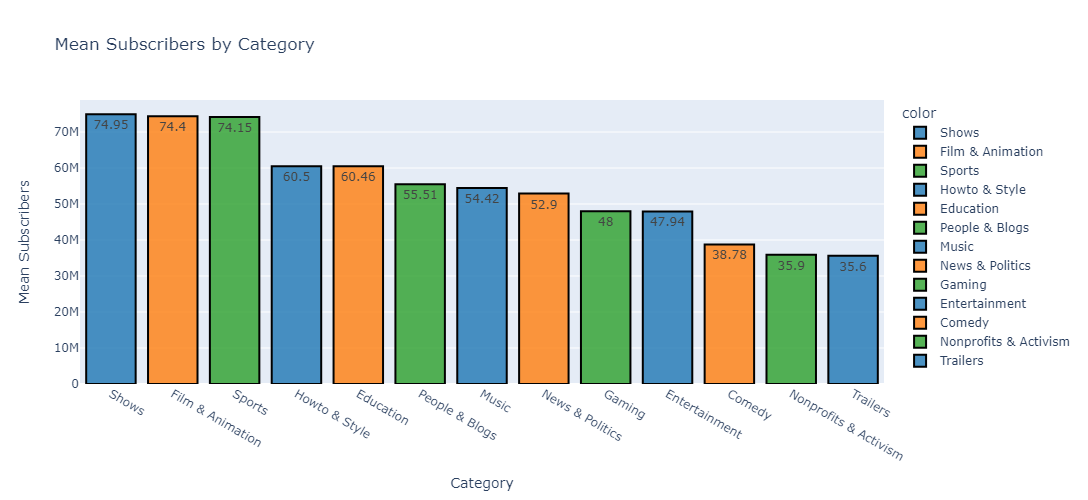

In [46]:
categories = df.groupby('category').mean(numeric_only=True).subscribers.sort_values(ascending=False)

fig = px.bar(x=categories.index, 
             y=categories.values,
             color=categories.index,
             color_discrete_sequence=color_scheme,
             labels={'x': 'Category', 'y': 'Mean Subscribers'},
             title='Mean Subscribers by Category',
             text=np.round(categories.values / 1000000, 2),
             height=500)

fig.update_traces(marker_line_width=2, marker_line_color="black")

fig.show()


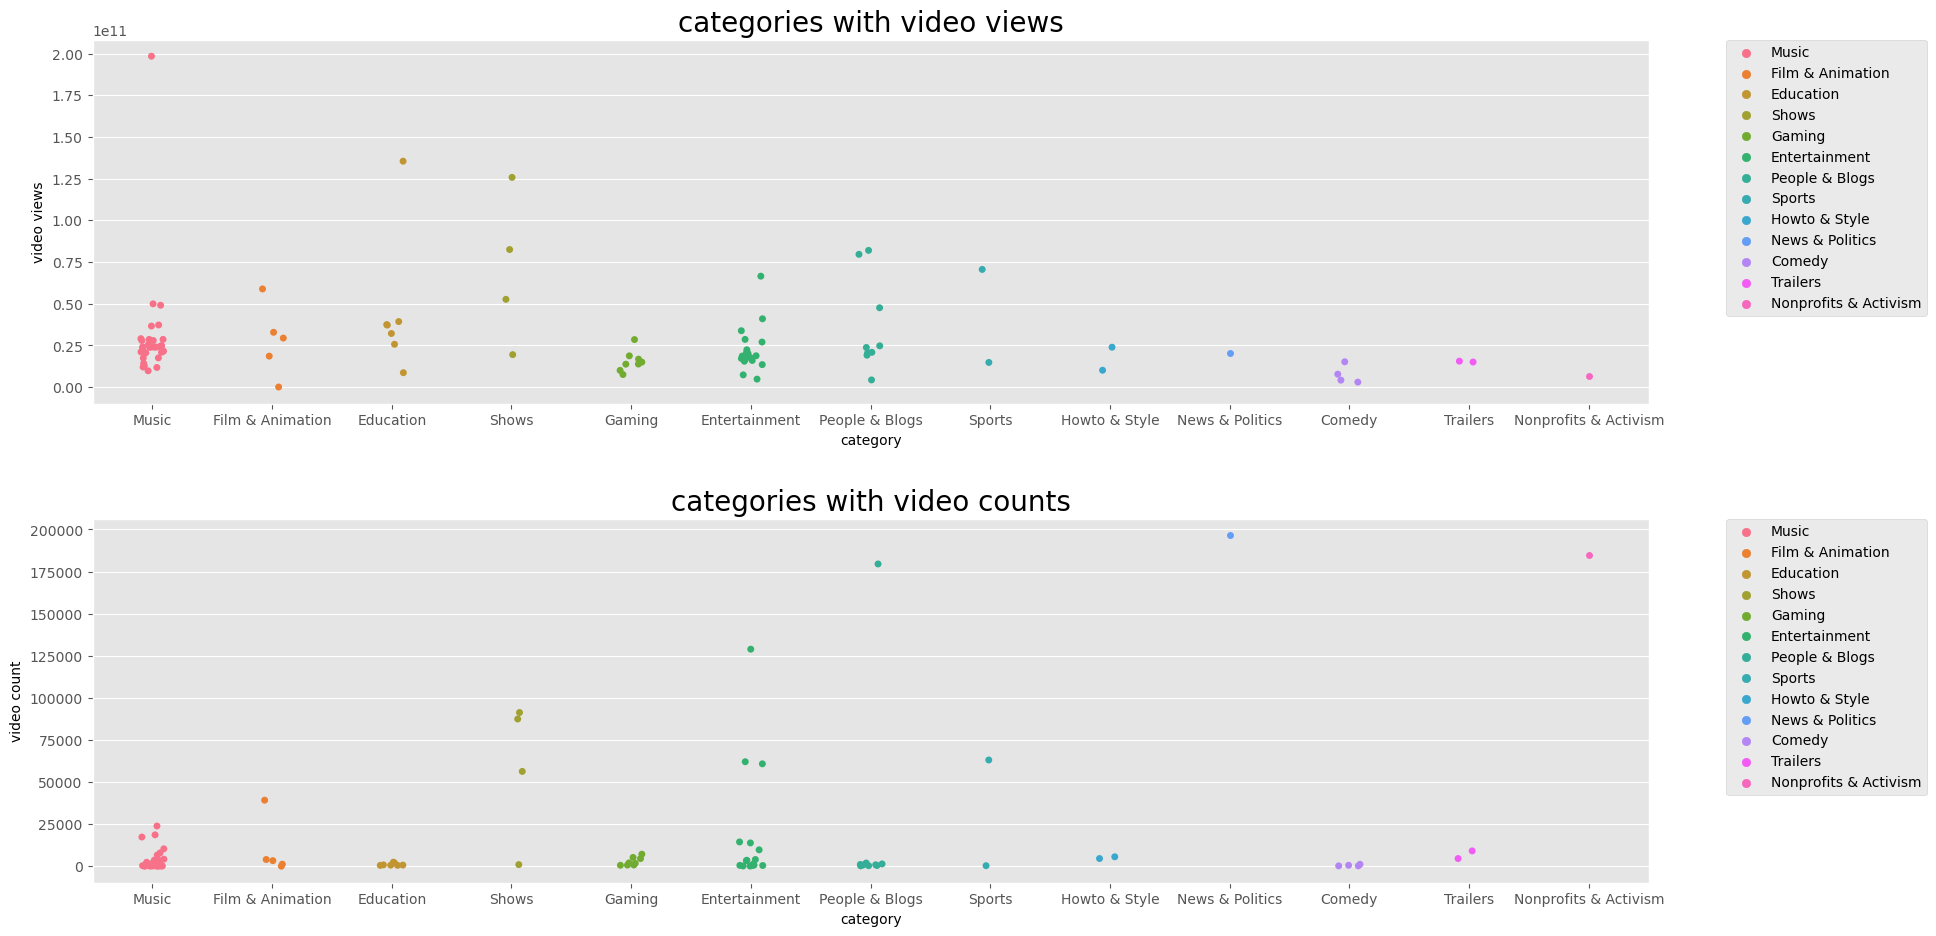

In [47]:
def stplot(data, xcol, ycol, huecol, axs, title):
    sns.stripplot(data = data, x = xcol, y = ycol, 
                  hue = huecol, edgecolor = 'red', ax = axs).set_title(title, fontsize = 20)
    axs.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title1 = 'categories with video views'
title2 = 'categories with video counts'
fig, ((ax1),(ax2)) = plt.subplots(ncols=1,nrows=2)
fig.set_size_inches(20,10)
stplot(df,'category', 'video views', 'category', ax1, title1)
stplot(df,'category', 'video count', 'category', ax2, title2)
fig.tight_layout(pad=3.0)

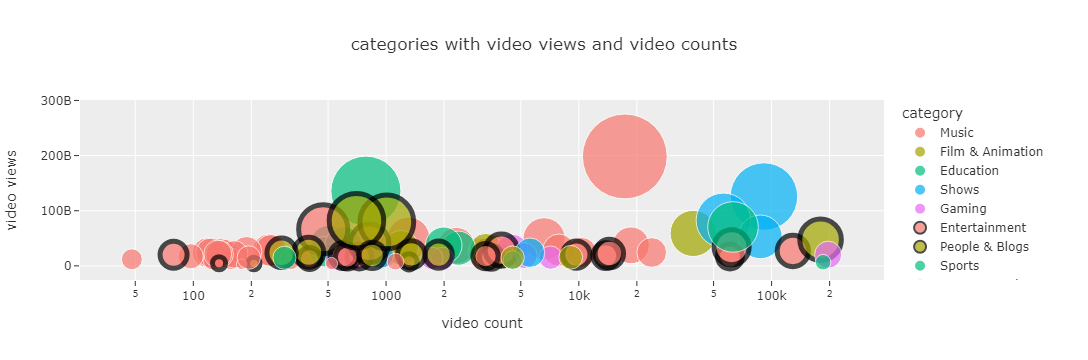

In [48]:
fig = px.scatter(df, x="video count", y="video views",
                 size="video views", color="category",
                 log_x=True, size_max=60,
                 title="categories with video views and video counts",
                 template = 'ggplot2')

lst = [5,6]
for idx in lst:
    fig.data[idx].marker.line.width = 5
    fig.data[idx].marker.line.color = 'black'
fig.show()

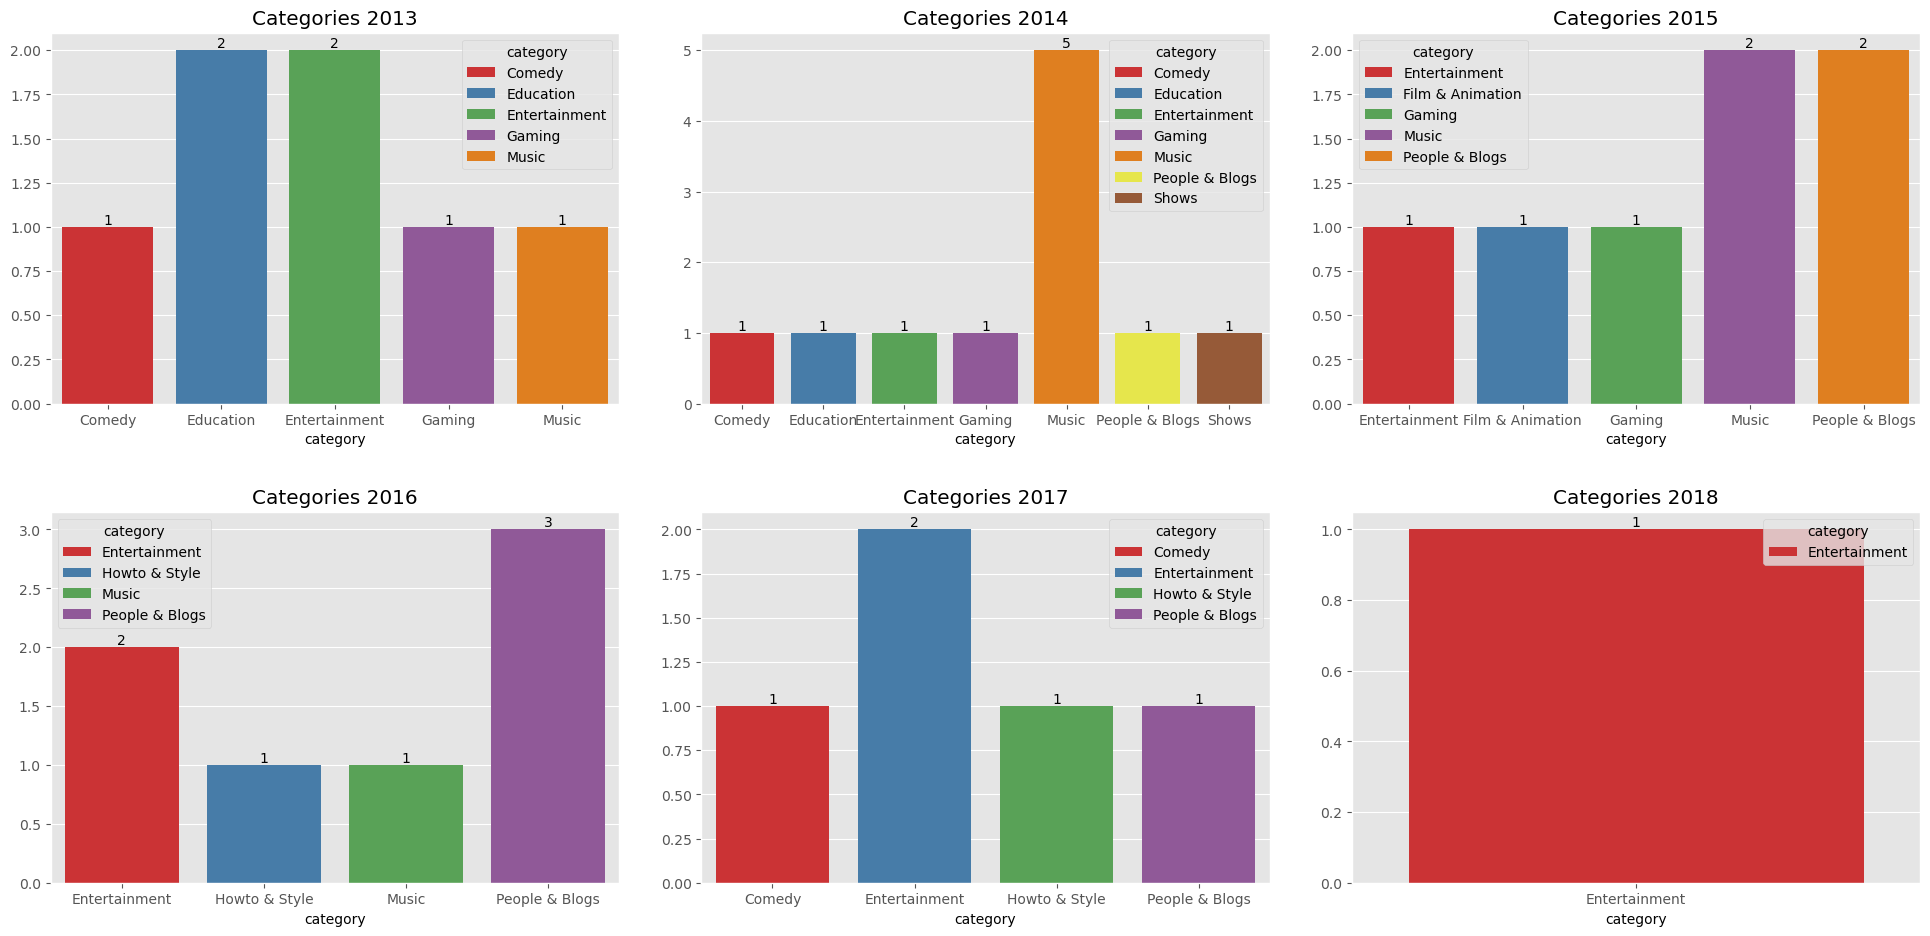

In [49]:
def barplot(x, y, axs, palette, title):
    ax = sns.barplot(x = x, y = y, hue = x, palette = palette, dodge=False, ax=axs)
    for num in range(len(y)):
        ax.bar_label(ax.containers[num])
    ax.set_title(title)
    return ax
y_2013 = df[df['started']==2013].groupby('category').size()
y_2014 = df[df['started']==2014].groupby('category').size()
y_2015 = df[df['started']==2015].groupby('category').size()
y_2016 = df[df['started']==2016].groupby('category').size()
y_2017 = df[df['started']==2017].groupby('category').size()
y_2018 = df[df['started']==2018].groupby('category').size()

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(ncols=3,nrows=2)
fig.set_size_inches(20,10)
barplot(y_2013.index, y_2013.values, ax1, 'Set1', 'Categories 2013')
barplot(y_2014.index, y_2014.values, ax2, 'Set1', 'Categories 2014')
barplot(y_2015.index, y_2015.values, ax3, 'Set1', 'Categories 2015')
barplot(y_2016.index, y_2016.values, ax4, 'Set1', 'Categories 2016')
barplot(y_2017.index, y_2017.values, ax5, 'Set1', 'Categories 2017')
barplot(y_2018.index, y_2018.values, ax6, 'Set1', 'Categories 2018')

fig.tight_layout(pad=3.0)

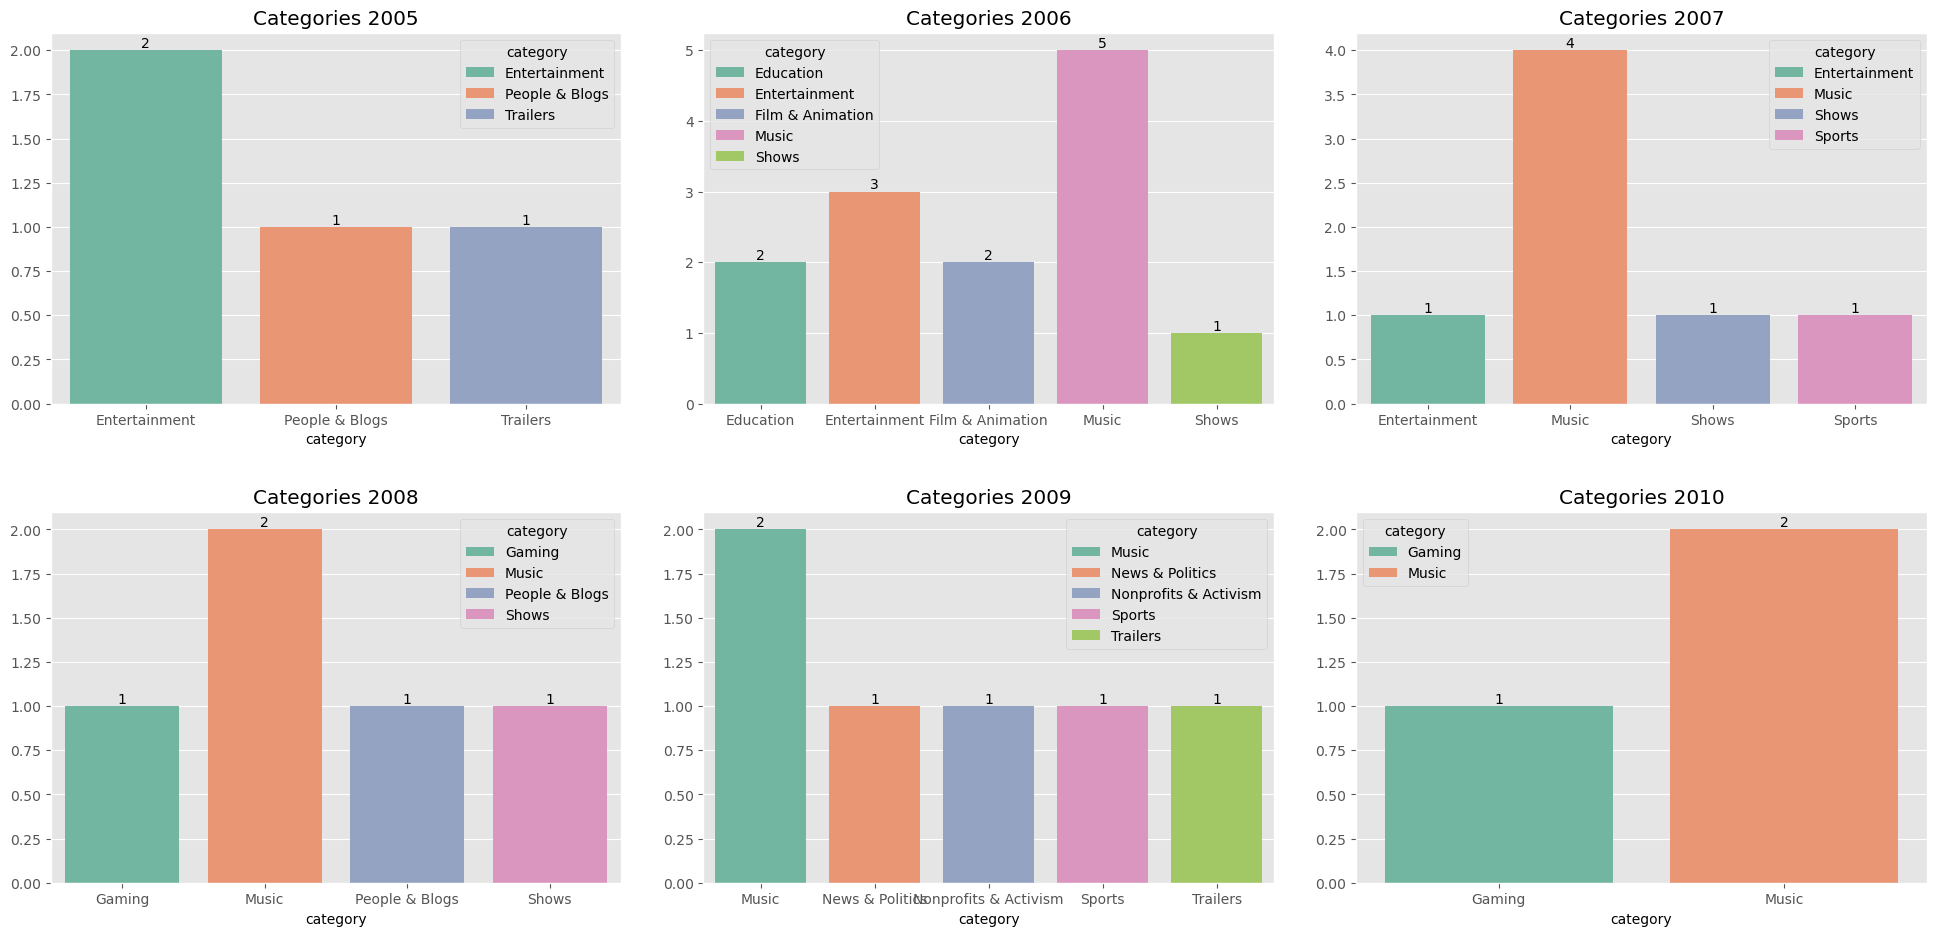

In [50]:
y_2005 = df[df['started']==2005].groupby('category').size()
y_2006 = df[df['started']==2006].groupby('category').size()
y_2007 = df[df['started']==2007].groupby('category').size()
y_2008 = df[df['started']==2008].groupby('category').size()
y_2009 = df[df['started']==2009].groupby('category').size()
y_2010 = df[df['started']==2010].groupby('category').size()

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(ncols=3,nrows=2)
fig.set_size_inches(20,10)
barplot(y_2005.index, y_2005.values, ax1,  'Set2', 'Categories 2005')
barplot(y_2006.index, y_2006.values, ax2,  'Set2', 'Categories 2006')
barplot(y_2007.index, y_2007.values, ax3,  'Set2', 'Categories 2007')
barplot(y_2008.index, y_2008.values, ax4,  'Set2', 'Categories 2008')
barplot(y_2009.index, y_2009.values, ax5,  'Set2', 'Categories 2009')
barplot(y_2010.index, y_2010.values, ax6,  'Set2', 'Categories 2010')

fig.tight_layout(pad=3.0)


In [51]:
year_sub = df.groupby('started').mean(numeric_only=True).reset_index()
def ptplot(data, xcol, ycol, colors, axs, titles):
    sns.pointplot(data=data, x=xcol, y=ycol,
                  color=colors, ax=axs)
    axs.set_title(titles)


C:\Users\SUBALAKSHMI\AppData\Local\Temp\ipykernel_1852\1523632786.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



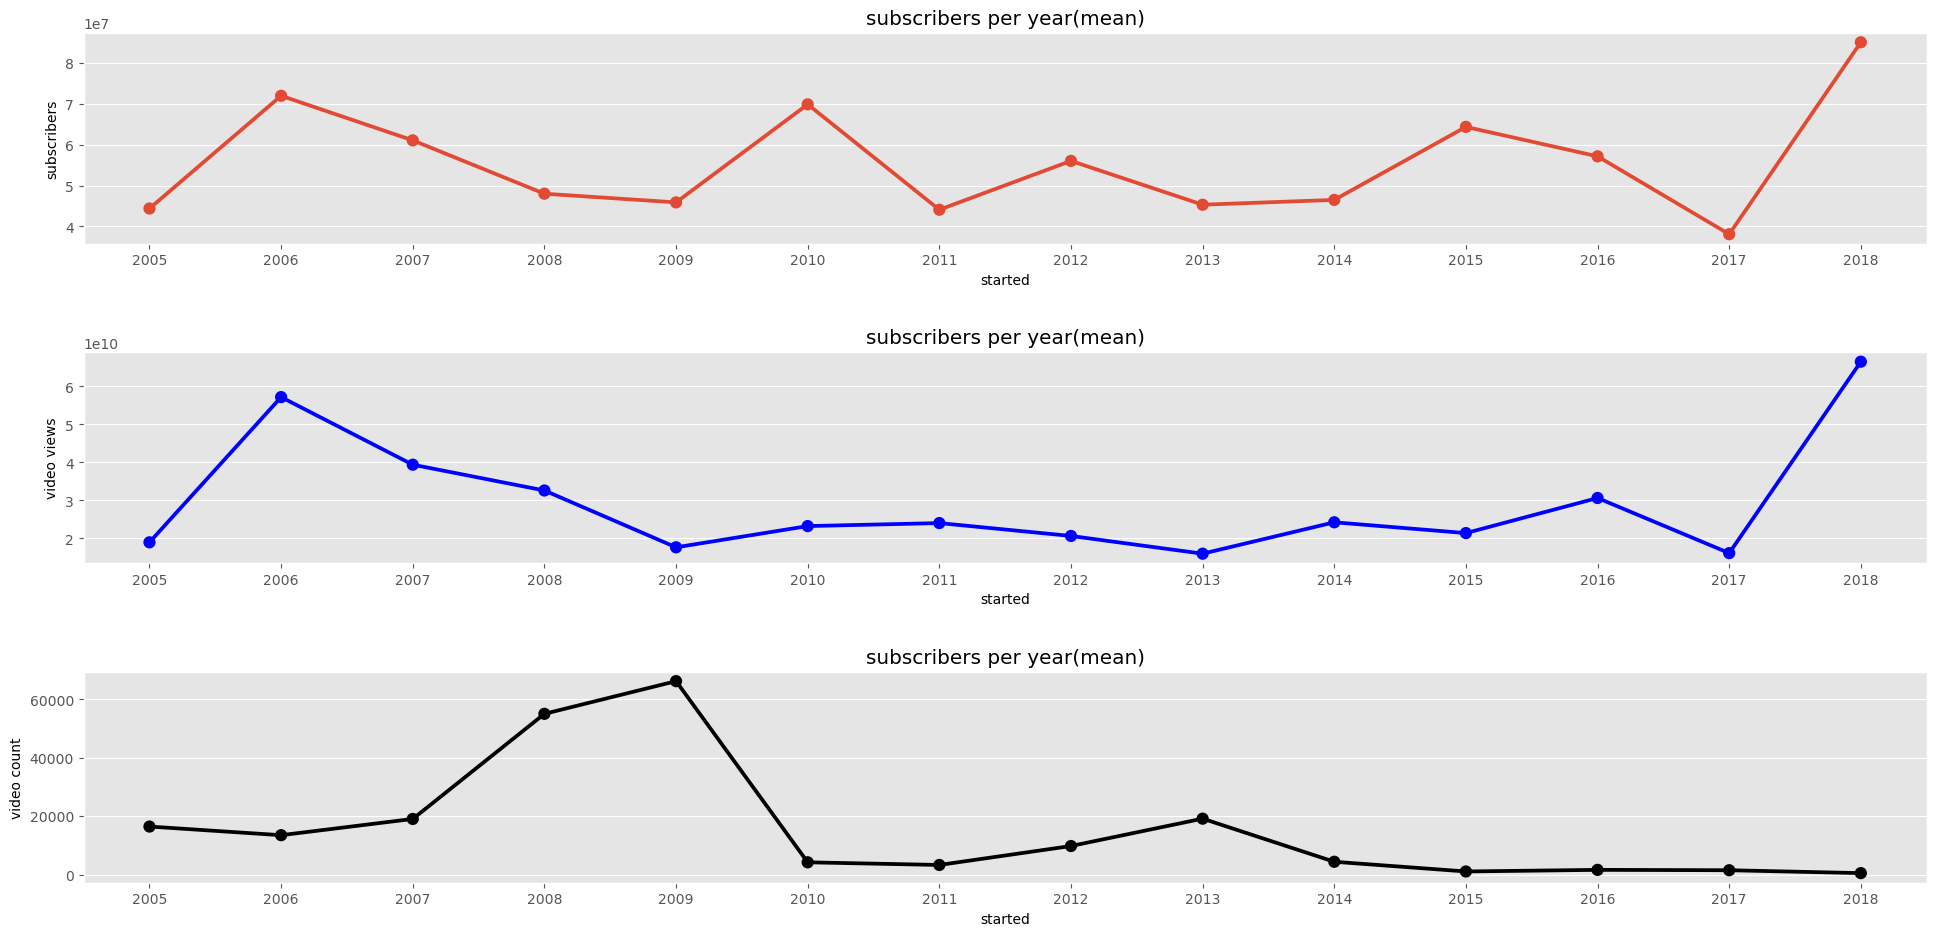

In [52]:
year_sub = df.groupby('started').mean().reset_index()
fig, ((ax1),(ax2),(ax3)) = plt.subplots(ncols=1,nrows=3)
fig.set_size_inches(20,10)

ptplot(year_sub, 'started', 'subscribers', None, ax1, 'subscribers per year(mean)')
ptplot(year_sub, 'started', 'video views', 'blue', ax2, 'subscribers per year(mean)')
ptplot(year_sub, 'started', 'video count', 'black', ax3, 'subscribers per year(mean)')

fig.tight_layout(pad=3.0)


Text(0.5, 1.0, 'Video Views with Video Counts')

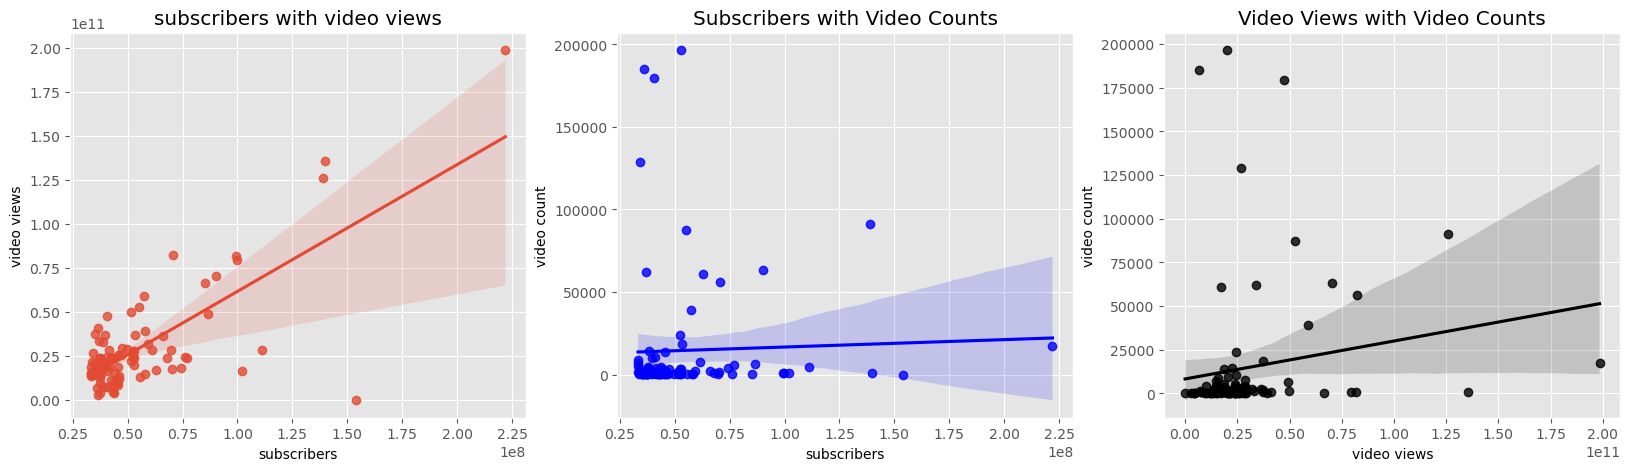

In [53]:
fig, ((ax1,ax2,ax3)) = plt.subplots(ncols=3,nrows=1)
fig.set_size_inches(20,5)

sns.regplot(x=df['subscribers'],
                y=df['video views'],
                ax=ax1).set_title('subscribers with video views')
sns.regplot(x=df['subscribers'],
                y=df['video count'],
                ax=ax2,
                color='blue').set_title('Subscribers with Video Counts')
sns.regplot(x=df['video views'],
                y=df['video count'],
                ax=ax3,
                color='black').set_title('Video Views with Video Counts')